In [0]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "last"
# ANN - Blood Transfusion service center dataset
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import io


In [37]:

from google.colab import files
uploaded = files.upload()



Saving transfusion.data.txt to transfusion.data.txt


In [39]:
Blood = pd.read_csv(io.StringIO(uploaded["transfusion.data.txt"].decode('utf-8')))
Blood.keys()


Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [40]:
Blood.shape

(748, 5)

In [41]:
import numpy as np
import pandas as pd
df = pd.DataFrame(Blood)
# use describe on dataframe
df.describe()


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [42]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2d1711588>,
      dtype=object)

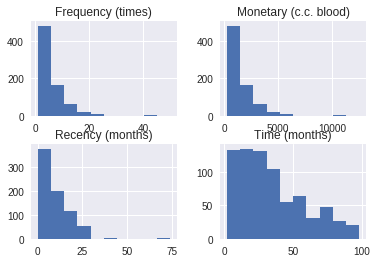

In [43]:
# let's plot the data
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# histogram of some selected features
df.iloc[:, 0:4].hist()


In [44]:
# let's plot correlations
correlations = df.iloc[:,0:4].corr()
correlations


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
Recency (months),1.000000,-0.182745,-0.182745,0.160618
Frequency (times),-0.182745,1.000000,1.000000,0.634940
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940
Time (months),0.160618,0.634940,0.634940,1.000000


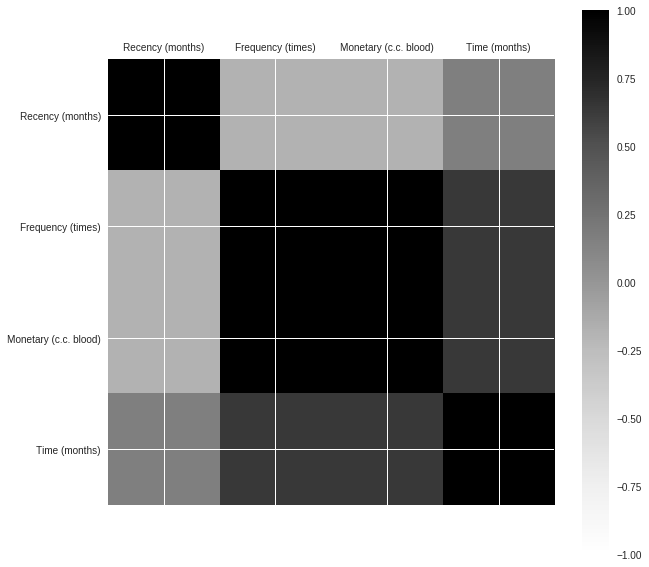

In [45]:
# plot correlation matrix
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.iloc[:, 0:4].columns)
ax.set_yticklabels(df.iloc[:, 0:4].columns)
plt.show()

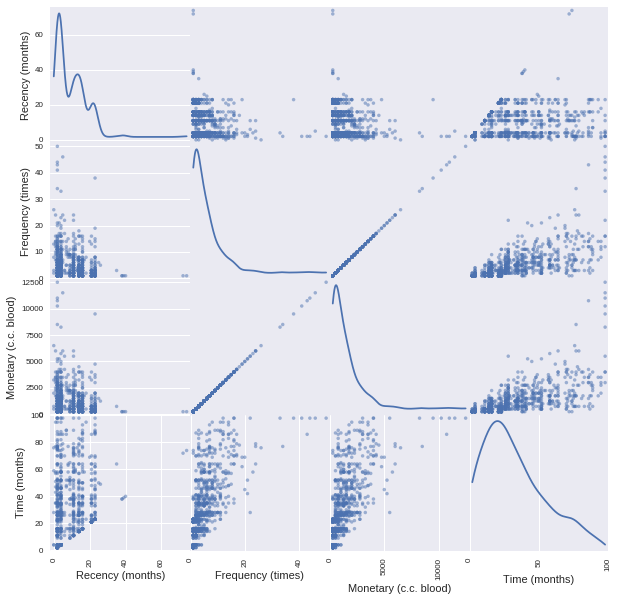

In [46]:
# let's create a scatterplot
scatter_matrix(df.iloc[:, 0:4],figsize=(10, 10), diagonal='kde')
plt.show()

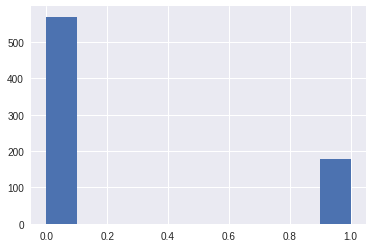

In [47]:
from IPython.display import display
X = df.iloc[:,0:4]
#display(X)
y = df.iloc[:,4]
y.hist()
#display(y)



In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

(598, 4)

(150, 4)

(598,)

(150,)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)




In [50]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30),solver="lbfgs",max_iter=500)
display(mlp)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))


[[92 17]
 [24 17]]


In [52]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.79      0.84      0.82       109
          1       0.50      0.41      0.45        41

avg / total       0.71      0.73      0.72       150

